### Calculate the distance between a linear regression line and the data points

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from sklearn.linear_model import LinearRegression

#### Residuals

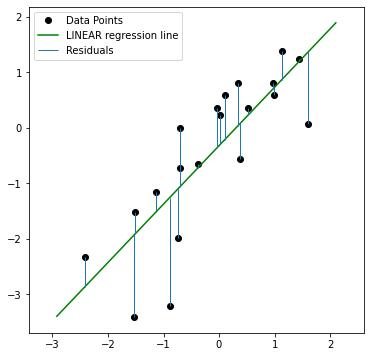

In [14]:
%matplotlib inline
from sklearn.linear_model import LinearRegression
fig = plt.figure(figsize=(6, 6))
ax = fig.subplots(1, 1, sharex=True )

x = np.random.randn(20,1)
y = 1*x +  np.random.randn(len(x)).reshape(-1, 1)
reg = LinearRegression().fit(x, y)

a = reg.coef_
c = reg.intercept_

ax.axis('equal')
ax.plot(x,y,'ko', label='Data Points')
lx = [min(x)-0.5, max(x)+0.5 ]
ax.plot(lx, a*lx+c,'-g', label='LINEAR regression line')

x1 = np.ravel(x)
y1 = np.ravel(y)
y2 = np.ravel(a*x1+c)
lines = np.array([((x1[i], y1[i]), (x1[i], y2[i])) for i in range(len(x))])
lc = LineCollection(lines,  linewidths=1, label='Residuals')
ax.add_collection(lc)
ax.autoscale()
ax.margins(0.1)
ax.legend();

#### Orthogonal projections to the line

In the case of a line in the plane given by the equation ax + by + c = 0, where a, b and c are real constants with a and b not both zero, the distance from the line to a point (x0, y0) is:

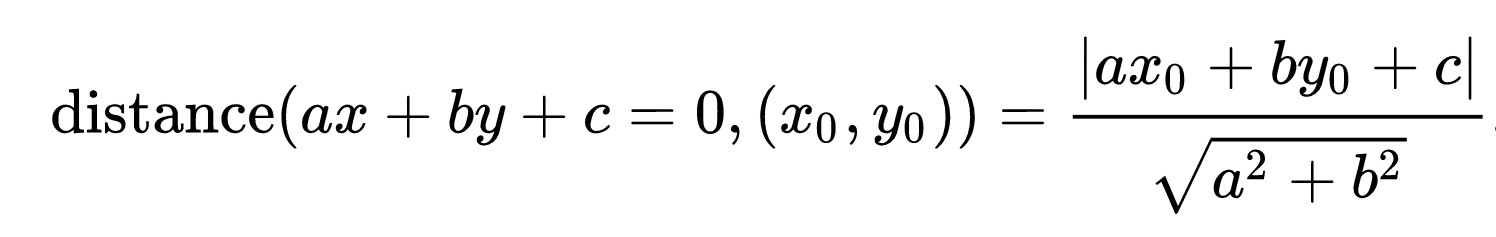

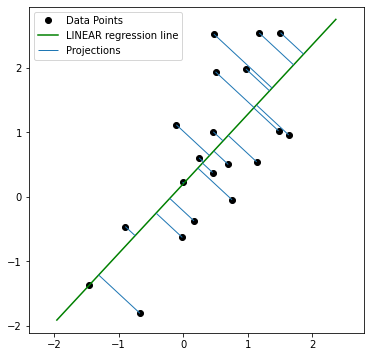

In [13]:
%matplotlib inline
fig = plt.figure(figsize=(6, 6))
ax = fig.subplots(1, 1, sharex=True, )

x = np.random.randn(20,1)
y = 1*x +  np.random.randn(len(x)).reshape(-1, 1)
reg = LinearRegression().fit(x, y)

a = reg.coef_
c = reg.intercept_
b = -1

# The distance between data points and the regression line
D = np.abs((a*x - y + c))/np.sqrt(a**2 + 1)

# The projection of data points on the regression line
xorth = (b*(b*x - a*y) - a*c)/(a**2 + 1);
yorth = (a*(-b*x + a*y) - b*c)/(a**2 + 1);

ax.axis('equal')
ax.plot(x,y,'ko', label='Data Points')
lx = [min(min(x), min(xorth))-0.5, max(max(x), max(xorth))+0.5 ]
ax.plot(lx, a*lx+c,'-g', label='LINEAR regression line')

x1 = np.ravel(x)
y1 = np.ravel(y)
x2 = np.ravel(xorth)
y2 = np.ravel(yorth)
lines = np.array([((x1[i], y1[i]), (x2[i], y2[i])) for i in range(len(x))])
lc = LineCollection(lines,  linewidths=1, label='Projections')
ax.add_collection(lc)
ax.autoscale()
ax.margins(0.1)
ax.legend();